In [1]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Dataset.csv', sep=',',encoding='utf-8')
data.head


<bound method NDFrame.head of                                                  Teks     Media    Label
0   Sekjen Partai Gerindra, Ahmad Muzani, menyingg...  Detikcom  Politik
1   Sekjen Partai Gerindra, Ahmad Muzani, menyingg...  Detikcom  Politik
2   Bakal calon wakil presiden (bacawapres) Koalis...  Detikcom  Politik
3   Polres Indramayu terjun ke sejumlah pondok pes...  Detikcom  Politik
4   Menteri Agama yang juga menjabat sebagai Ketua...  Detikcom  Politik
..                                                ...       ...      ...
85  Nama Ragil Kembar Dwi Suryo atau yang akrab di...  Liputan6  Hiburan
86  Sebagai pusat hiburan keluarga, Timezone mengu...  Liputan6  Hiburan
87  Selain bermain musik, siapa sangka penyanyi wa...  Liputan6  Hiburan
88  Vokalis Band Wali, Farhan Zainal Muttaqin atau...  Liputan6  Hiburan
89  Lalisa Manoban, atau yang lebih dikenal dengan...  Liputan6  Hiburan

[90 rows x 3 columns]>

**Cleansing**

In [3]:
import re

def casefolding(Teks):
    #menghapus baris yang ada kata tertentu
    Teks = re.sub(r'â€œ','', Teks)
    #Teks = re.sub(r'^Liputancom, Jakarta ','', Teks)
    
    
    # Tahap-10: konversi ke karakter huruf kecil
    Teks = Teks.lower()
    Teks = Teks.strip(" ")
    Teks = re.sub(r'[?|$|.|!^2_:")(-+,)]', '', Teks)
    # Tahap-1: Non-ascii
    Teks = re.sub(r'[^\x00-\x7F]+', ' ', Teks)
    
    
    # Tahap-3: mentions
    Teks = re.sub(r'\#([\w]+)',' ', Teks)
    # Tahap-4_alt-2: konversi tagar ke kalimat (pemisahan string berdasarkan huruf kapital)**
    Teks = re.sub(r'((?<=[a-z])[A-Z]|[A-Z](?=[a-z]))', ' \\1', Teks)
    # Tahap-5: simbol
    Teks = re.sub(r'[!$%^&*@#()_+|~=`{}\[\]%\-:";\'<>?,.\/]', ' ', Teks)
    # Tahap-6: angka
    Teks = re.sub(r'[0-9]+', '', Teks)
    # Tahap-7: koreksi duplikasi tiga karakter beruntun atau lebih (contoh. yukkk)
    Teks = re.sub(r'([a-zA-Z])\1\1', '\\1', Teks)
    # Tahap-8: spasi ganda (atau lebih) menjadi satu spasi
    Teks = re.sub(' +', ' ', Teks)
    # Tahap-9: spasi di awal dan akhir kalimat
    Teks = re.sub(r'^[ ]|[ ]$', '', Teks)

    return Teks

# Assuming 'data' is a DataFrame with a column named 'Teks'
data['Teks'] = data['Teks'].apply(casefolding)

# Save the cleansed DataFrame to a CSV file
#data.to_csv('cleansed_scraping.csv', index=False)

data.head(70)


,Teks,Media,Label
0,sekjen partai gerindra ahmad muzani menyinggun...,Detikcom,Politik
1,sekjen partai gerindra ahmad muzani menyinggun...,Detikcom,Politik
2,bakal calon wakil presiden bacawapres koalisi ...,Detikcom,Politik
3,polres indramayu terjun ke sejumlah pondok pes...,Detikcom,Politik
4,menteri agama yang juga menjabat sebagai ketua...,Detikcom,Politik
...,...,...,...
65,calon presiden capres prabowo subianto dipredi...,Liputan6,Politik
66,ketua umum ketum partai gerindra sekaligus bak...,Liputan6,Politik
67,bakal calon presiden dari koalisi indonesia ma...,Liputan6,Politik
68,peneliti dari lembaga survei indonesia politic...,Liputan6,Politik


**Tokenization**

In [4]:
def token(Teks):
    nstr = Teks.split(' ')
    dat = []
    a = -1
    for hu in nstr:
        a = a + 1
        if hu == '':
            dat.append(a)
    p = 0
    b = 0
    for q in dat:
        b = q - p
        del nstr[b]
        p = p + 1
    return nstr

data['Teks'] = data['Teks'].apply(token)
data.head(10)


,Teks,Media,Label
0,"[sekjen, partai, gerindra, ahmad, muzani, meny...",Detikcom,Politik
1,"[sekjen, partai, gerindra, ahmad, muzani, meny...",Detikcom,Politik
2,"[bakal, calon, wakil, presiden, bacawapres, ko...",Detikcom,Politik
3,"[polres, indramayu, terjun, ke, sejumlah, pond...",Detikcom,Politik
4,"[menteri, agama, yang, juga, menjabat, sebagai...",Detikcom,Politik
5,"[bakal, calon, presiden, bacapres, ganjar, pra...",Detikcom,Politik
6,"[bacawapres, mahfud, md, memberi, bekal, kepad...",Detikcom,Politik
7,"[kelompok, masyarakat, di, jawa, tengah, jaten...",Detikcom,Politik
8,"[polres, malang, gencar, menjaga, sinergi, dan...",Detikcom,Politik
9,"[pengacara, otto, hasibuan, didapuk, sebagai, ...",Detikcom,Politik


**StopWord**

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def stopword_removal(Teks):
    filtering=stopwords.words('indonesian', 'english')
    x=[]
    data=[]
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit=filter(myFunc,Teks)
    for x in fit:
        data.append(x)
    return data
data['Teks']=data['Teks'].apply(stopword_removal)
data.head()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Teks,Media,Label
0,"[sekjen, partai, gerindra, ahmad, muzani, meny...",Detikcom,Politik
1,"[sekjen, partai, gerindra, ahmad, muzani, meny...",Detikcom,Politik
2,"[calon, wakil, presiden, bacawapres, koalisi, ...",Detikcom,Politik
3,"[polres, indramayu, terjun, pondok, pesantren,...",Detikcom,Politik
4,"[menteri, agama, menjabat, ketua, ketum, gp, a...",Detikcom,Politik


**Stemming**

In [11]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade Sastrawi


Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Teks):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Teks:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean= " ".join(do)
    print(d_clean) 
    return d_clean
data[ 'Teks']= data['Teks'].apply(stemming)

data.to_csv('data_stemming.csv', index=False)
data_clean_stem= pd.read_csv('data_stemming.csv', encoding='latin1')
data_clean_stem.head()

sekjen partai gerindra ahmad muzani singgung cawapres gibran rakabuming pimpin pks nilai anak muda milik hak kesempatananak muda hak anak muda sempat bagus nggak anak muda ketua dpp pks mardani ali sera wartawan jumat mardani proses barus proses etika scroll to continue with content syarat proses proses etika ujarnyamardani dukung anak muda kualitas sebut pks masalah anak muda pimpin pilih rakyatkita dukung anak muda kualitas integritas pilih rakyat mesti ujarnyamuzani sindir duet capres cawapres prabowo subianto gibran rakabuming raka muzani sebab suka pasang iniitu orang suka pasang prabowo gibran orang situasi milu sepakat mas gibran cawapres koalisi indonesia maju sambut indonesia emas muzani hadir konsolidasi ribu kader kabupaten tegal kota tegal kutip jumat muzani sebut khawatir peran anak muda signifikan milu sebut gibran wakil anak muda siap indonesia emasagar usia negara indonesia gibran wakil anak muda siap indonesia emas generasi muda siap pimpin rela muzaniwakil ketua tkn p

,Teks,Media,Label
0,sekjen partai gerindra ahmad muzani singgung c...,Detikcom,Politik
1,sekjen partai gerindra ahmad muzani singgung c...,Detikcom,Politik
2,calon wakil presiden bacawapres koalisi ubah m...,Detikcom,Politik
3,polres indramayu terjun pondok pesantren ponpe...,Detikcom,Politik
4,menteri agama jabat ketua tum gp ansor yaqut c...,Detikcom,Politik


In [7]:
data_clean_stem = data_clean_stem.astype({'Label' : 'category'})
data_clean_stem = data_clean_stem.astype({'Teks' : 'string'})
data_clean_stem.dtypes

Teks     string[python]
Media            object
Label          category
dtype: object

**TF/IDF**

In [31]:
# proses TF-IDF dan
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf =tf.fit_transform(data_clean_stem['Teks'].astype('U'))
text_tf

<90x3823 sparse matrix of type '<class 'numpy.float64'>'
	with 9888 stored elements in Compressed Sparse Row format>

In [35]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(text_tf, data_clean_stem['VALUE', test_size=0.2, random_state=42])


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1270398445.py, line 3)

In [41]:
#peforma algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf= MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:",precision_score(y_test,predicted,average="Label", Label="Politik"))
print("MultinomialNB Recall:", recall_score(y_test,predicted,average="Label", Label="Politik"))
print("MultinomialNB f1_score:",f1_score(y_test,predicted, average="Label", Label="Politik"))
print(f'confusion matrix:\n{confusion_matrix(y_test,predicted)}')
print('--------------------------------------------------------------------')
print(classification_report(y_test,predicted,zero_division=0))

MultinomialNB Accuracy: 0.8333333333333334


TypeError: precision_score() got an unexpected keyword argument 'Label'

**Count Data From Label News**

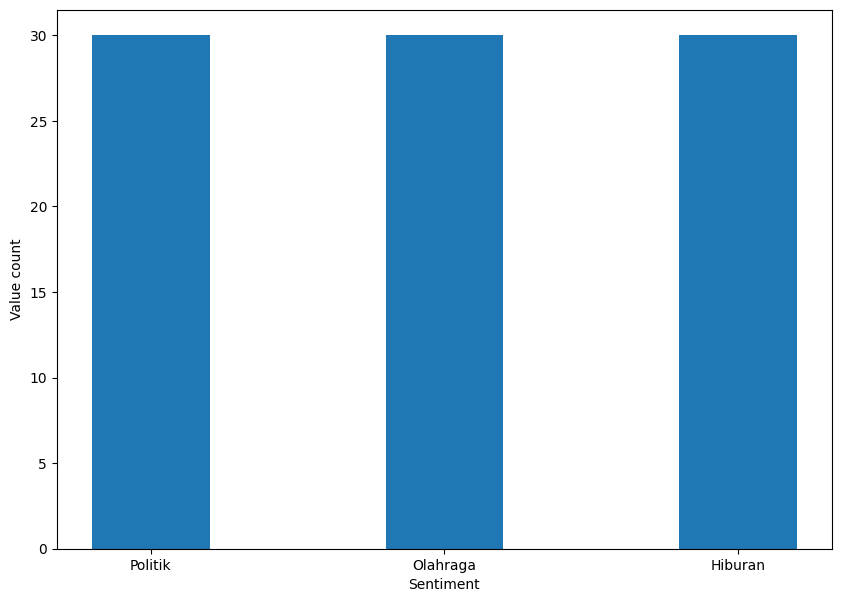

In [39]:
import matplotlib

import matplotlib.pyplot as plt
# Barplot
df_plot = data['Label'].value_counts().rename_axis('Sentiment').reset_index(name = 'Counts')

y = df_plot['Counts']
x = df_plot['Sentiment']

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(x, y, width = 0.4)
plt.xlabel('Sentiment')
plt.ylabel('Value count')
plt.show()